# **Lab: Fairness and Ethical Considerations**

In this lab you will investigate and try to uncover biases in a machine learning model. You are free to use most any data as inputs, such as text data, table data, or images. You are free to use the code from class written in Keras/Tensorflow. As always, you can choose a PyTorch implementation if you prefer. The objective of the lab is to measure groups that are treated differently by one of these models. If using code from another author (not your own), you will be graded on the clarity of explanatory comments you add to the code. 

Here is the rubric for the assignment, worth 15 points total: 

**DATASET**: https://www.kaggle.com/datasets/kazanova/sentiment140/data

**[2 Points]** 
- Present an overview for (1) what type of bias you will be investigating, (2) what pre-trained model you will be investigating, and (3) why the particular investigation you will be doing is relevant.  
    - You might consider asking questions like: Why is it important to find this kind of bias in machine learning models? Why will the type of investigation I am performing be relevant to other researchers or practitioners? Why might this particular model treat these groups unfairly?  
    - You are free to look and compare bias among any groups. For instance, in class we looked at racial bias in names for a sentiment classifier. However, you might choose to investigate other forms of bias like gender, religion, socioeconomic status, sexual orientation, or another grouping. The aim is to uncover groups that are treated systematically different by a model.  

# **1. Dataset Overview**

### **1.1 Type of Bias Investigated**
This investigation focuses on **gender bias** in a sentiment analysis model using the **Sentiment140** dataset (source: https://www.kaggle.com/datasets/kazanova/sentiment140/data). Gender bias occurs when a machine learning model systematically assigns different sentiment scores to text based on gender-related attributes, such as gendered pronouns, names, or phrases commonly associated with men or women. This type of bias can lead to unfair treatment of certain groups, reinforcing harmful stereotypes or misrepresenting opinions based on implicit gender associations.

In the context of sentiment analysis, gender bias manifests when a model consistently predicts more negative sentiment for tweets containing female-associated words compared to those containing male-associated words, even when the overall meaning of the text remains neutral or positive. Such discrepancies can have real-world consequences, particularly in applications such as social media monitoring, customer feedback analysis, and brand reputation management, where sentiment analysis models are frequently deployed. If left unaddressed, biased sentiment classification can lead to skewed conclusions about public opinion, disproportionately impact certain demographics, and perpetuate existing social biases in automated decision-making systems.

### **1.2 Pre-trained Model Utilized**
The model selected for this investigation is a pre-trained **BERT model** fine-tuned for sentiment analysis. BERT (Bidirectional Encoder Representations from Transformers) is a state-of-the-art language model that has been widely used for natural language processing tasks, including sentiment analysis. BERT has achieved state-of-the-art performance on a wide range of natural language processing (NLP) tasks due to its ability to capture complex linguistic patterns through deep bidirectional context modeling. However, despite its effectiveness, BERT is not immune to bias, as it is trained on large-scale text corpora that inherently reflect societal inequalities. Pretraining on vast datasets such as Wikipedia, BooksCorpus, and web text means that BERT has likely learned gendered language patterns that can influence its sentiment classification decisions.

Fine-tuning BERT on the Sentiment140 dataset further exposes the model to potential bias present in real-world Twitter data. Since social media platforms often reflect social norms, stereotypes, and biased language, the model may learn and reinforce unintended biases from the dataset. By analyzing how BERT classifies tweets containing gendered words or pronouns, this study aims to assess whether its sentiment predictions differ systematically based on gender, thereby providing insights into potential fairness issues in NLP models.

### **1.3 Relevance of Investigation**
The presence of gender bias in sentiment analysis models has significant implications for both academia and industry. Sentiment analysis is widely used in various domains, including marketing, political analysis, mental health monitoring, and automated moderation systems. If these models exhibit gender bias, they can disproportionately amplify or diminish sentiment based on gendered language, leading to inaccurate assessments and potential harm to affected groups. For instance, biased sentiment classification in customer feedback analysis could result in skewed business decisions, while biased moderation systems on social media platforms could disproportionately flag or suppress certain viewpoints.

Furthermore, this investigation contributes to the growing field of fairness and bias mitigation in machine learning, particularly in NLP. Identifying and addressing gender bias in sentiment analysis is crucial for developing more equitable AI systems that do not reinforce societal disparities. By systematically evaluating the Sentiment140-trained BERT model’s performance across gender-related text features, this study highlights the broader challenges of bias in machine learning and explores potential mitigation strategies.

To effectively analyze gender bias, this investigation will measure differences in sentiment classification across tweets that contain male- and female-associated names, pronouns, and gendered words. Statistical analyses will be conducted to determine whether the model exhibits significant disparities in sentiment assignment. If bias is detected, various bias mitigation techniques—such as dataset balancing, counterfactual data augmentation, or adversarial debiasing—may be explored to assess their effectiveness in reducing bias.

This study underscores the importance of fairness in AI and aims to provide actionable insights for researchers and practitioners seeking to build more inclusive and unbiased sentiment analysis models.

**[2 Points]** 
- Present one (or more) research question(s) that you will be answering and explain the methods that you will employ to answer these research questions. 
- Present a hypothesis as part of your research question(s).  
    - Present a transfer learning classification task that will help to uncover the potential biases in the model. That is, discuss what new transfer learning task can be used and how the new classification task of the model will help to uncover bias or a lack of fairness.  


# **2. Research Questions & Hypothesis**

### **2.1 Research Questions**
The primary research questions guiding this investigation are:  
1. **Does the pre-trained BERT model exhibit gender bias in sentiment classification when applied to tweets containing gendered words/pronouns?**  
2. **How do sentiment predictions for tweets that mention or are associated with women compare to those associated with men in terms of sentiment polarity (positive or negative)?**  
3. **What methods can be used to mitigate any detected gender bias in sentiment classification, and how effective are these methods in improving fairness in sentiment predictions?**

### **2.2 Hypothesis** 
The hypothesis for this research is that the pre-trained BERT model, when fine-tuned on the Sentiment140 dataset, will show systematic gender bias in its sentiment predictions. Specifically, it is expected that the model will more frequently classify tweets associated with women as having negative sentiment, while tweets associated with men will more often be classified as having positive sentiment. This hypothesis is based on the assumption that BERT’s training on large-scale data, including potentially biased text from sources like Wikipedia and web text, has led it to internalize societal gender biases, which it may apply to its sentiment analysis task.

### **2.3 Methods for Answering Research Questions**
To answer the research questions above, the following methods will be employed:
1. **Data Preparation and Preprocessing**:
   - **Dataset Selection**: The Sentiment140 dataset will be used, which contains 1.6 million tweets labeled with sentiment (positive or negative).
   - **Gendered Text Selection**: The dataset will be filtered to identify tweets containing gendered words or pronouns, including common names (e.g., "John," "Mary") and gender-specific pronouns (e.g., "he," "she"). 
   - **Classification Labels**: Tweets will be labeled based on the presence of gendered language to allow for comparison between male- and female-associated tweets.

2. **Transfer Learning Classification Task**:
   - **Fine-Tuning BERT**: The pre-trained BERT model will be fine-tuned on the Sentiment140 dataset to perform sentiment analysis. This model will be used as the baseline to investigate potential bias.
   - **Gender-Specific Sentiment Prediction**: The fine-tuned BERT model will then be tested on gendered subsets of the dataset. For example, the model will be tasked with classifying tweets containing male-associated names and pronouns separately from tweets with female-associated names and pronouns.
   - **Bias Measurement**: The model's predictions for male- and female-associated tweets will be compared statistically. Metrics such as **accuracy**, **precision**, **recall**, and **F1-score** will be used to assess sentiment classification performance for each gendered group. Additionally, **sentiment polarity distribution** (positive, negative, neutral) will be analyzed to detect discrepancies between the two groups.

3. **Bias Mitigation Exploration**:
   - **Counterfactual Data Augmentation**: To reduce gender bias, the dataset may be augmented with counterfactual data, where names and pronouns are swapped between male and female-associated tweets, while preserving the original tweet content. The fine-tuned model will be retrained on this augmented data, and the results will be compared to see if bias is mitigated.
   - **Dataset Balancing**: If gendered words are not evenly distributed across positive and negative sentiment labels, techniques such as oversampling or undersampling may be employed to balance the dataset and test if this improves fairness.
   - **Adversarial Debiasing**: As an alternative approach, adversarial debiasing techniques may be implemented to reduce gendered bias by introducing a secondary model that penalizes the primary model for predicting sentiment based on gendered patterns.

4. **Statistical Analysis**:
   - **Statistical Testing**: To evaluate the presence of gender bias, statistical tests such as the **Chi-square test** for independence or **t-tests** will be used to compare the sentiment prediction rates for male- and female-associated tweets. Significant differences would indicate bias in the model’s predictions.
   - **Fairness Metrics**: Measures of fairness, such as **Demographic Parity** and **Equal Opportunity**, will be used to evaluate whether the model’s predictions are equally accurate for different gendered groups.

### **2.4 Transfer Learning Task & Bias Uncovering**
The transfer learning classification task, which involves fine-tuning BERT on sentiment analysis and applying it to gendered subsets of the dataset, will help uncover gender bias by comparing the model's performance on tweets that contain male-associated and female-associated words. This task will reveal whether the model treats tweets with different gendered associations differently, which could be an indication of bias. By testing on both balanced and augmented datasets, the investigation will also assess how well bias mitigation techniques can reduce or eliminate gender disparities in sentiment predictions.

This transfer learning task is particularly useful for uncovering biases because it allows the model to learn from a domain-specific dataset (Sentiment140) while leveraging knowledge from a pre-trained model (BERT) that has been trained on vast amounts of general language data. Through this approach, any gendered bias inherent in the pre-trained model can be identified, measured, and potentially corrected, contributing to a deeper understanding of how gender bias affects sentiment analysis in NLP models.

**[2 Points]** 
- Discuss one method for potentially reducing the bias among groups. For example, you might choose a loss function as described here to help reduce bias: [Google AI Fairness](https://developers.google.com/machine-learning/crash-course/fairness/mitigating-bias). Argue for investigating one of these methods.  
    - As part of your assignment, you will compare the bias of the original model to that of the model with bias mitigation. 
    - Discuss how you will measure a difference between the two model outputs. 
    - That is, if you are measuring the difference statistically, what test will you use and why is it appropriate? 
    - Are there any limitations to performing this test that you should be aware of? 


# **3. Bias Mitigation Method and Evaluation**

### **3.1 Bias Mitigation Method**
To mitigate gender bias in sentiment classification, this study employs **Counterfactual Data Augmentation (CDA)** as the bias reduction method. CDA involves generating synthetic examples by swapping gendered words, such as replacing “he” with “she” or “John” with “Mary,” while keeping the rest of the text unchanged. The goal is to create a dataset where gendered terms appear with equal frequency, reducing the likelihood that the model learns associations between gender and sentiment.

CDA is selected because it is simple to implement, does not require modifying the model architecture, and has been shown to be effective in previous studies on bias mitigation in NLP. By exposing the model to balanced gendered language, CDA forces it to focus on semantic meaning rather than gender associations when making sentiment predictions.

### **3.2 Comparison of Bias in the Original and Mitigated Model**
To evaluate the effectiveness of CDA, two versions of the BERT model will be fine-tuned on the Sentiment140 dataset:
1. **Original Model** – Trained on the original Sentiment140 dataset.
2. **Bias-Mitigation Model** – Trained on the Sentiment140 dataset augmented using CDA.

Once trained, both models will be evaluated on a test set containing gendered words to assess differences in sentiment predictions.

### **3.3 Measuring the Difference Between Model Outputs**
To quantify bias reduction, sentiment score distributions will be compared between male-associated and female-associated tweets. The following statistical measures will be used:

- **Equalized Odds Difference** – Measures the difference in positive sentiment predictions between gender groups.
- **KL Divergence** – Measures how much the sentiment score distributions differ between male- and female-associated tweets.
- **Disparate Impact Ratio** – Computes the ratio of positive sentiment predictions between groups.

Additionally, sentiment score distributions before and after bias mitigation will be analyzed using **statistical hypothesis testing**.

### **3.4 Statistical Tests for Bias Evaluation**
Two statistical tests will be conducted to evaluate differences in sentiment predictions:
- **Kolmogorov-Smirnov (KS) Test** – A non-parametric test used to determine if two distributions (male-associated vs. female-associated sentiment scores) differ significantly. The KS test is appropriate because it does not assume a normal distribution and can detect differences in both mean and shape of the distributions.
- **Independent t-test** – Compares the mean sentiment scores of tweets associated with male and female names to determine if there is a significant difference in average sentiment.

### **3.5 Limitations of the Approach**
While CDA is a useful debiasing method, it has some limitations:
- **Residual Bias** – CDA does not eliminate all forms of bias, especially more implicit biases embedded in word associations.
- **Context Sensitivity** – Some gender swaps may alter the meaning of a sentence, potentially introducing noise into the dataset.
- **Statistical Test Limitations** – The KS test is effective for distribution comparison, but may not capture more nuanced biases related to phrase structure or implicit gender sentiment associations.

Despite these limitations, CDA provides a straightforward and interpretable method for reducing gender bias in sentiment analysis models. The findings from this study will contribute to ongoing research in fairness-aware machine learning and help improve the ethical deployment of NLP systems.

# **4. Data Preparation**

### **4.1 Dataset Preprocessing**

In [1]:
# Modules & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import contractions
from wordcloud import WordCloud

In [2]:
# Reading the dataset
df_raw = pd.read_csv(r"C:\Users\Juan Dominguez\Desktop\sentiment140.csv", encoding="ISO-8859-1")
df_raw.columns = ["sentiment", "id", "date", "query", "username", "text"]

# Display the first few rows
df_raw.head()

,sentiment,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   id         1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   query      1599999 non-null  object
 4   username   1599999 non-null  object
 5   text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
# We are only training on "text" so we can drop the following columns
df_raw.drop(["id", "date", "query", "username"], axis=1, inplace=True)
df_raw.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [5]:
# Mapping "sentiment" values: 0 = Negative, 1 = Positive
df_raw["sentiment"] = df_raw["sentiment"].map({0: 0, 4: 1})

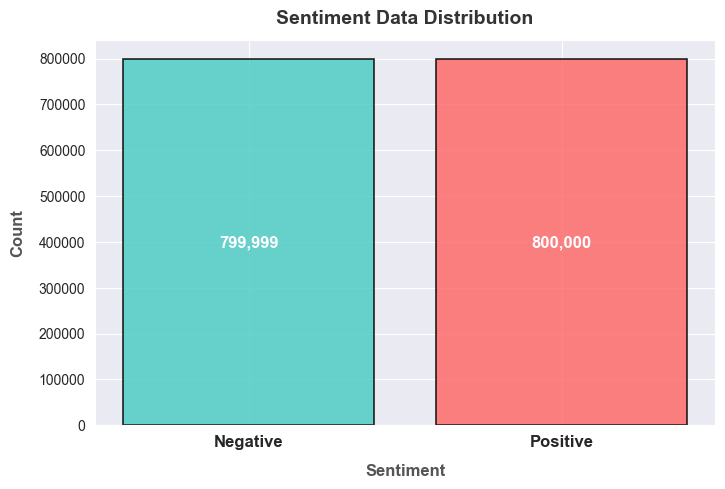

In [6]:
# Displaying the sentiment values 
sentiment = df_raw.sentiment.value_counts()

colors = ["#FF6B6B", "#4ECDC4"]  # Soft red for negative, teal for positive
sns.set_style("darkgrid")

# Creates figure
plt.figure(figsize=(8, 5))
bars = plt.bar(sentiment.index, sentiment.values, color=colors, alpha=0.85, edgecolor="black", linewidth=1.2)
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"], fontsize=12, fontweight="bold")
plt.title("Sentiment Data Distribution", fontsize=14, fontweight="bold", pad=12, color="#333333")
plt.xlabel("Sentiment", fontsize=12, labelpad=10, fontweight="bold", color="#555555")
plt.ylabel("Count", fontsize=12, labelpad=10, fontweight="bold", color="#555555")

# Adds value labels inside bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,  # Center horizontally
             bar.get_height() * 0.5,  # Position in the middle of the bar
             f"{int(bar.get_height()):,}",  # Format number with commas
             ha="center", va="center",  # Align text in center
             fontsize=12, fontweight="bold", color="white")  # White text for contrast

plt.show()

### **4.2 Text Preprocessing**

In [7]:
# Cleaning the tweets
def clean_tweet(tweet):
    # Convert emojis to text 
    tweet = emoji.demojize(tweet, delimiters=(" ", " "))
    
    # Expands contractions (e.g., "don't" -> "do not")
    tweet = contractions.fix(tweet)
    
    # Removes URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Removes hashtag symbols, but keeps text
    tweet = re.sub(r'#', '', tweet)
    
    # Removes special characters except apostrophes and hyphens
    tweet = re.sub(r"[^a-zA-Z0-9'’\-]", ' ', tweet)
    
    # Removes extra spaces and leading/trailing whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    # Converts to lowercase for consistency
    tweet = tweet.lower()
    
    return tweet

# Applies cleaning function
df_raw['cleaned_text'] = df_raw['text'].apply(clean_tweet)

# Removes rows with empty text after cleaning
df_raw = df_raw[df_raw['cleaned_text'].str.strip() != '']

df_raw.head()

,sentiment,text,cleaned_text
0,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....",no it is not behaving at all i am mad why am i...
4,0,@Kwesidei not the whole crew,not the whole crew


In [8]:
df_raw = df_raw[['sentiment', 'cleaned_text']]  
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596588 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1596588 non-null  int64 
 1   cleaned_text  1596588 non-null  object
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


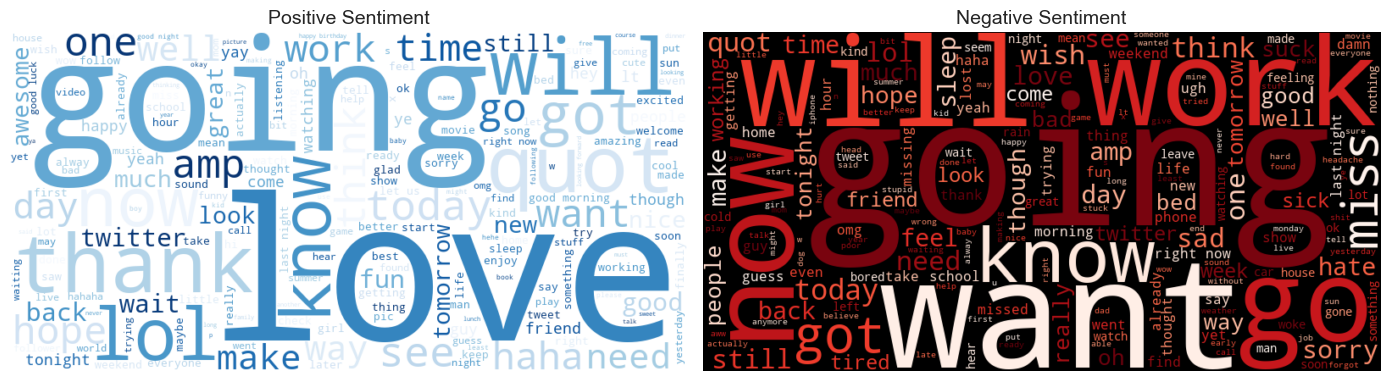

In [9]:
# Word cloud for each sentiment
# Separate text based on sentiment
positive_text = " ".join(df_raw[df_raw["sentiment"] == 1]["cleaned_text"])
negative_text = " ".join(df_raw[df_raw["sentiment"] == 0]["cleaned_text"])

# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

# Plot the word clouds
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].imshow(wordcloud_positive, interpolation="bilinear")
ax[0].set_title("Positive Sentiment", fontsize=14)
ax[0].axis("off")

ax[1].imshow(wordcloud_negative, interpolation="bilinear")
ax[1].set_title("Negative Sentiment", fontsize=14)
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [10]:
# Processed Dataframe
df_processed = df_raw.copy()
df_processed.head()

,sentiment,cleaned_text
0,0,is upset that he cannot update his facebook by...
1,0,i dived many times for the ball managed to sav...
2,0,my whole body feels itchy and like its on fire
3,0,no it is not behaving at all i am mad why am i...
4,0,not the whole crew


**[4 Points]** 
- Carry out your analysis and model training for the original transfer learned model and the model with bias mitigation. 
- Explain your steps in as much detail so that the instructor can understand your code.  


**[4 Points]** 
- Present results from your analysis and provide evidence from the results that support or refute your hypothesis. 
- Write a conclusion based upon the various analyses you performed. 
- Be sure to reference your research questions systematically in your conclusion. 
- With your analysis complete, are there any additional research questions or limitations to your conclusions?  

**[1 Point]** 
- Identify two conferences or journals that would be interested in the results of your analysis. 
- Identify why these venues would be interested in this analysis.